In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [7]:
!pip install wget
!pip install unzip

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
data = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names= ['user id','movie id','rating','timestamp'])

d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Noir | Horror | Musical | Mystery | Romance | SciFi | Thriller | War | Western'
column_names = d.split(' | ')
items_data = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names,encoding='latin-1')
movies_data = items_data[['movie id','movie title']]

merged_data = pd.merge(data, movies_data, how='inner', on='movie id')
final_data = merged_data.groupby(by= ['user id' , 'movie title'] , as_index=False).agg({"rating":"mean"})

In [ ]:
final_data.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
Utility_matrix = final_data.pivot(index = 'user id' , columns='movie title' , values='rating')
Utility_matrix.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [ ]:
Utility_matrix = Utility_matrix.fillna(0)

In [ ]:
Utility_matrix.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
utility = Utility_matrix.values
utility

array([[0., 0., 2., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.shape(utility)

(943, 1664)

In [ ]:
items = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names,encoding='latin-1')
unknown_item = items.unknown
action_item = items.Action
adventure_item = items.Adventure
animation_item = items.Animation
children_item = items.Children
comedy_item = items.Comedy
crime_item = items.Crime
documentary_item = items.Documentary
drama_item = items.Drama
fantasy_item = items.Fantasy
film_noir_item = items.Noir
horror_item = items.Horror
musical_item = items.Musical
mystery_item = items.Mystery
romance_item = items.Romance
sci_fi_item = items.SciFi
thriller_item = items.Thriller
war_item = items.War
western_item = items.Western

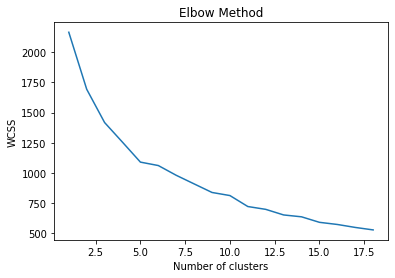

In [ ]:
genre = []
for movie in range(0,1664):

    genre.append([unknown_item[movie],adventure_item[movie],adventure_item[movie],animation_item[movie],children_item[movie],comedy_item[movie],crime_item[movie],documentary_item[movie],drama_item[movie],fantasy_item[movie],film_noir_item[movie],horror_item[movie],musical_item[movie],mystery_item[movie],romance_item[movie],sci_fi_item[movie],thriller_item[movie],war_item[movie],western_item[movie]])


genre = np.array(genre)


wcss = []
for k in range(1,19):

    cluster = KMeans(n_clusters=k)
    cluster.fit_predict(genre)
    wcss.append(cluster.inertia_)

plt.plot(range(1, 19), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
cluster = KMeans(n_clusters=19)
cluster.fit_predict(genre)

array([15,  2,  8, ...,  6,  0,  1], dtype=int32)

In [ ]:
clustered_utility = []

for i in range(0,943):

    tmp = []
Avg_rate = np.zeros(19)

  for j in range(0,19):

    tmp.append([])

for k in range(0,1664):

    if utility[i][k] != 0 :
        tmp[cluster.labels_[k] - 1].append(utility[i][k])
        
for j in range(0,19):

    if len(tmp[j]) != 0:
        Avg_rate[j] = np.mean(tmp[j])

    else:
        Avg_rate[j] = 0
  
  clustered_utility.append(Avg_rate)


clustered_utility = np.array(clustered_utility)
 

In [ ]:
clustered_utility

array([[3.80851064, 3.53846154, 3.875     , ..., 2.85714286, 3.85714286,
        3.54166667],
       [4.11111111, 3.4       , 3.42857143, ..., 5.        , 3.        ,
        3.55555556],
       [2.83333333, 2.5       , 2.        , ..., 2.66666667, 3.        ,
        3.18181818],
       ...,
       [4.        , 4.        , 5.        , ..., 3.        , 4.5       ,
        4.16666667],
       [4.4       , 5.        , 4.        , ..., 4.        , 4.        ,
        4.13636364],
       [3.57575758, 2.        , 3.30769231, ..., 3.5       , 4.33333333,
        3.34146341]])

In [ ]:
np.shape(clustered_utility)

(943, 19)

**now we run matrix factorization on clustered_utility**

# Matrix factorization

In [1]:
pd.DataFrame(clustered_utility)

NameError: name 'pd' is not defined